In [1]:
# Import necessary libraries

import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine, text

pd.set_option("display.max_columns", None)

In [2]:
# Load environment variables from .env file

from dotenv import load_dotenv

load_dotenv()

True

In [3]:
# Connect to Postgres

POSTGRES_USER = os.getenv("POSTGRES_USER")
POSTGRES_PASSWORD = os.getenv("POSTGRES_PASSWORD")
POSTGRES_DB = os.getenv("POSTGRES_DB")
POSTGRES_PORT = os.getenv("POSTGRES_PORT", 5432)
POSTGRES_HOST = "localhost"


connection_string = f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
engine = create_engine(connection_string)

In [4]:
# Import queries

with open(
    "/Users/anthony/Documents/GitHub/f1data/piastri/docs/analysis_denormalized.sql", "r"
) as file:
    sql_queries = file.read()

queries = sql_queries.split(";")
sql_temp = queries[0].strip()
sql_quali = queries[1].strip()
sql_race = queries[2].strip()

In [9]:
# Run queries to create DataFrames

with engine.connect() as connection:
    connection.execute(text(sql_temp))
    connection.commit()

    df_quali = pd.read_sql_query(text(sql_quali), engine)
    df_race = pd.read_sql_query(text(sql_race), engine)

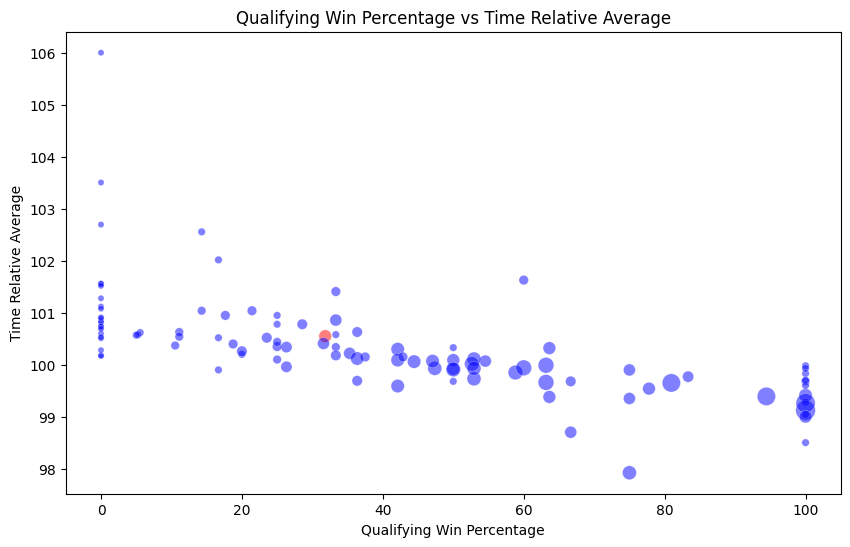

In [22]:
# Plot qualifying data

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_quali,
    x="quali_win_pct",
    y="time_relative_avg",
    size="quali_win_total",
    sizes=(20, 200),
    hue=(df_quali["id_rookie"] == "piastri"),
    palette={True: "red", False: "blue"},
    legend=False,
    alpha=0.5,
)

plt.xlabel("Qualifying Win Percentage")
plt.ylabel("Time Relative Average")
plt.title("Qualifying Win Percentage vs Time Relative Average")

# Show plot
plt.show()

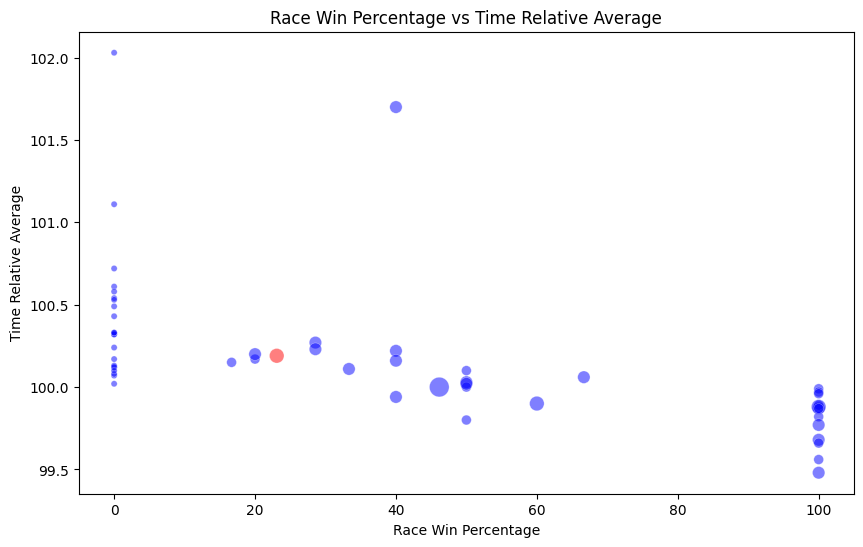

In [27]:
# Plot race data

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_race,
    x="race_win_pct",
    y="time_relative_avg",
    size="race_win_total",
    sizes=(20, 200),
    hue=(df_race["id_rookie"] == "piastri"),
    palette={True: "red", False: "blue"},
    legend=False,
    alpha=0.5,
)

plt.xlabel("Race Win Percentage")
plt.ylabel("Time Relative Average")
plt.title("Race Win Percentage vs Time Relative Average")

# Show plot
plt.show()

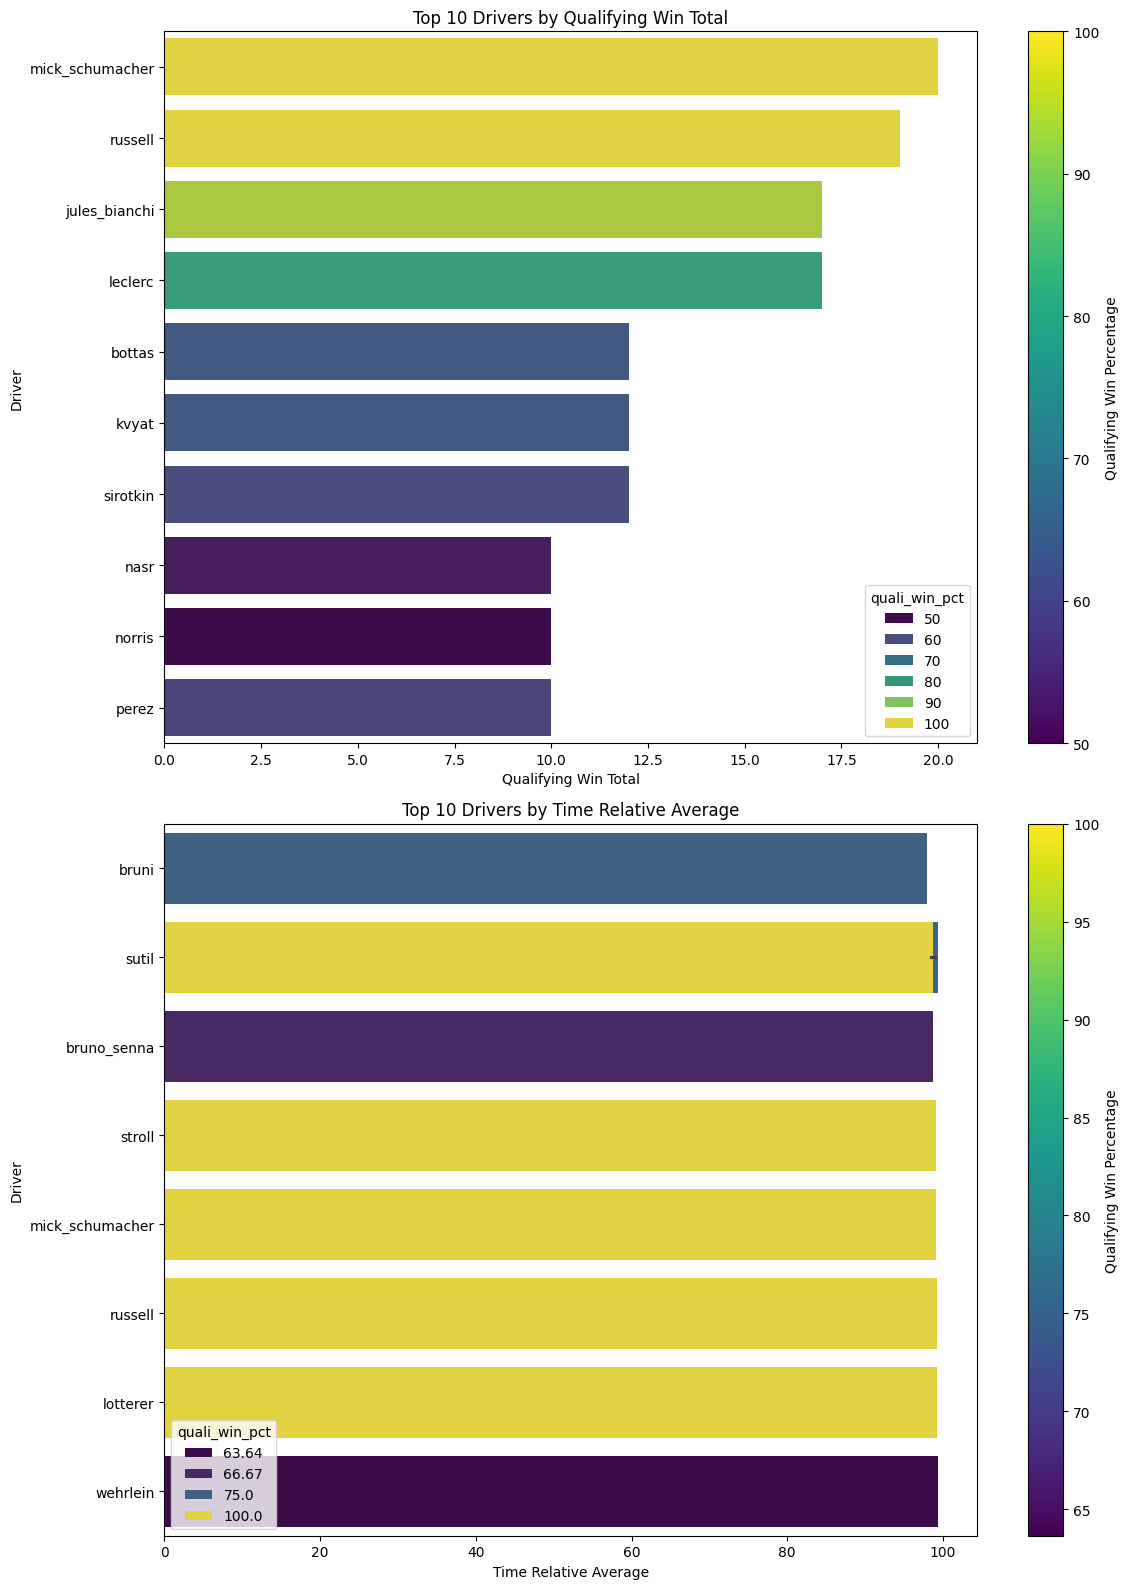

In [35]:
# Create DataFrames for each ranking
top10_quali_win_total = df_quali.nlargest(10, "quali_win_total")
top10_time_relative_avg = df_quali.nsmallest(10, "time_relative_avg")

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Plot top 10 by quali_win_total
sns.barplot(
    x="quali_win_total",
    y="id_rookie",
    data=top10_quali_win_total,
    palette=sns.color_palette("viridis", as_cmap=True),
    hue="quali_win_pct",
    dodge=False,
    ax=axes[0],
)
axes[0].set_title("Top 10 Drivers by Qualifying Win Total")
axes[0].set_xlabel("Qualifying Win Total")
axes[0].set_ylabel("Driver")

# Add color bar for the first plot
norm = plt.Normalize(
    top10_quali_win_total["quali_win_pct"].min(),
    top10_quali_win_total["quali_win_pct"].max(),
)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes[0], orientation="vertical", label="Qualifying Win Percentage")

# Plot top 10 by time_relative_avg
sns.barplot(
    x="time_relative_avg",
    y="id_rookie",
    data=top10_time_relative_avg,
    palette=sns.color_palette("viridis", as_cmap=True),
    hue="quali_win_pct",
    dodge=False,
    ax=axes[1],
)
axes[1].set_title("Top 10 Drivers by Time Relative Average")
axes[1].set_xlabel("Time Relative Average")
axes[1].set_ylabel("Driver")

# Add color bar for the second plot
norm = plt.Normalize(
    top10_time_relative_avg["quali_win_pct"].min(),
    top10_time_relative_avg["quali_win_pct"].max(),
)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes[1], orientation="vertical", label="Qualifying Win Percentage")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

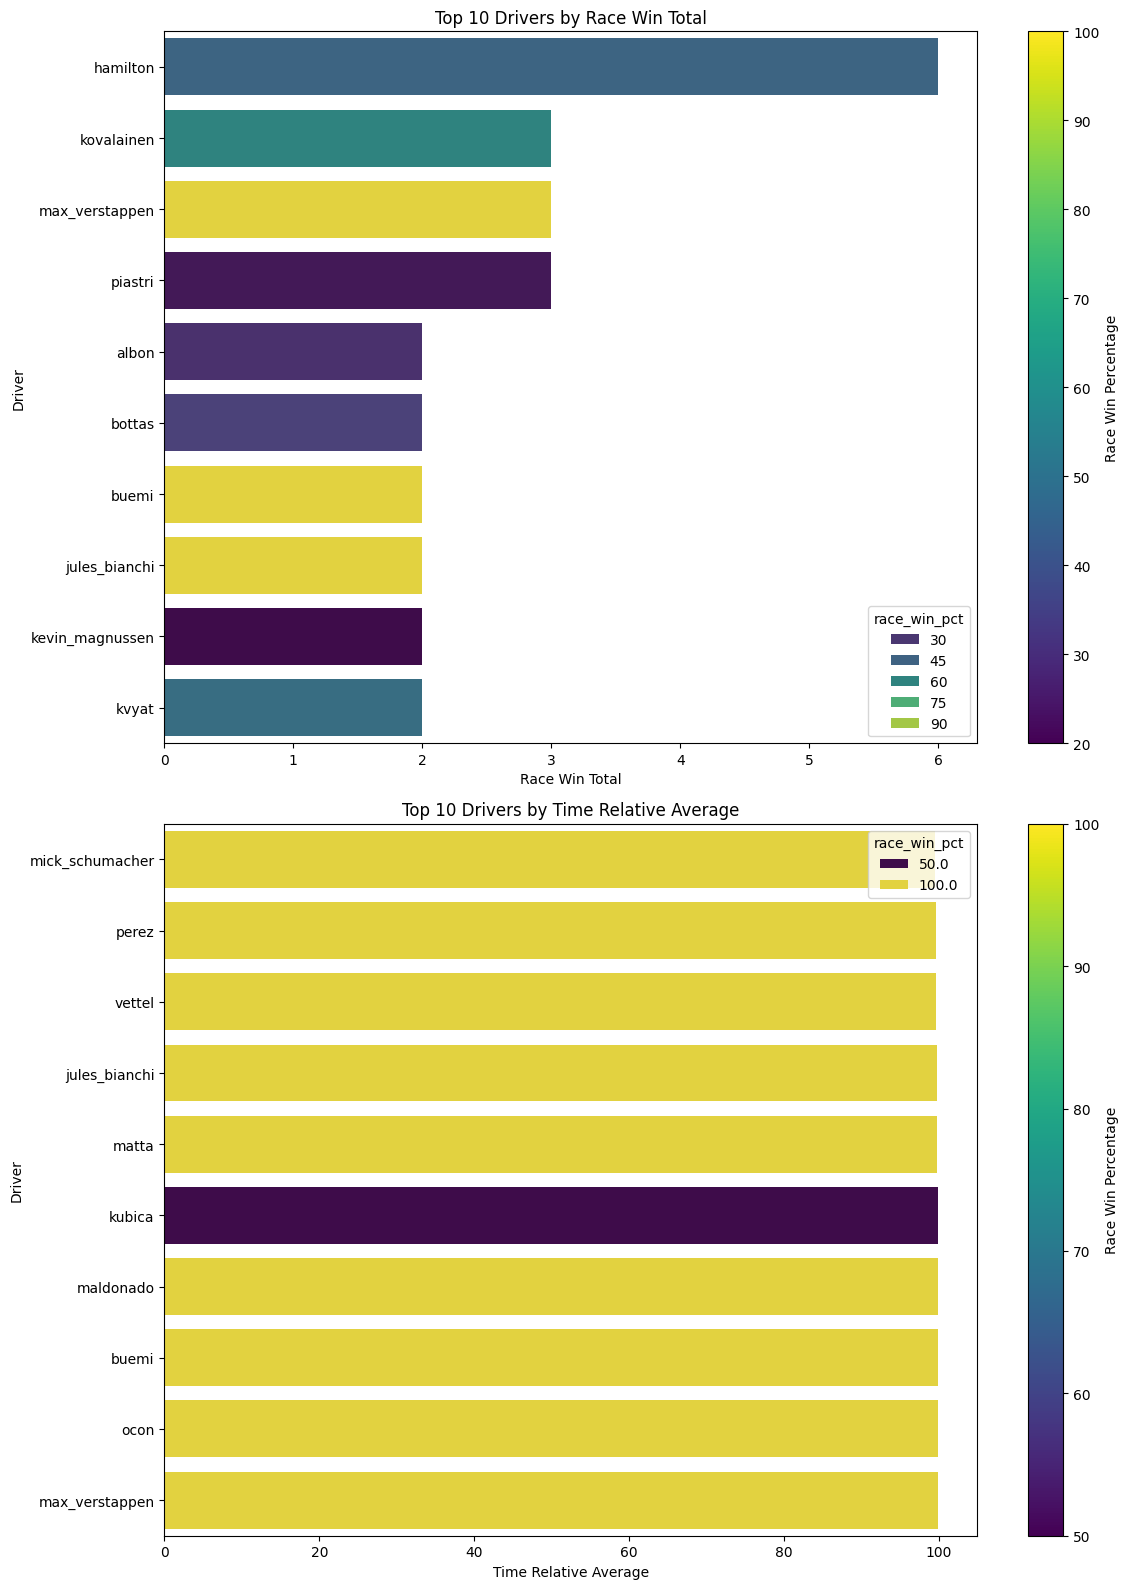

In [37]:
# Create DataFrames for each ranking
top10_race_win_total = df_race.nlargest(10, "race_win_total")
top10_time_relative_avg = df_race.nsmallest(10, "time_relative_avg")

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Plot top 10 by quali_win_total
sns.barplot(
    x="race_win_total",
    y="id_rookie",
    data=top10_race_win_total,
    palette=sns.color_palette("viridis", as_cmap=True),
    hue="race_win_pct",
    dodge=False,
    ax=axes[0],
)
axes[0].set_title("Top 10 Drivers by Race Win Total")
axes[0].set_xlabel("Race Win Total")
axes[0].set_ylabel("Driver")

# Add color bar for the first plot
norm = plt.Normalize(
    top10_race_win_total["race_win_pct"].min(),
    top10_race_win_total["race_win_pct"].max(),
)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes[0], orientation="vertical", label="Race Win Percentage")

# Plot top 10 by time_relative_avg
sns.barplot(
    x="time_relative_avg",
    y="id_rookie",
    data=top10_time_relative_avg,
    palette=sns.color_palette("viridis", as_cmap=True),
    hue="race_win_pct",
    dodge=False,
    ax=axes[1],
)
axes[1].set_title("Top 10 Drivers by Time Relative Average")
axes[1].set_xlabel("Time Relative Average")
axes[1].set_ylabel("Driver")

# Add color bar for the second plot
norm = plt.Normalize(
    top10_time_relative_avg["race_win_pct"].min(),
    top10_time_relative_avg["race_win_pct"].max(),
)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes[1], orientation="vertical", label="Race Win Percentage")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()